In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

# Discrete distributions



### Bernoulli distribution
Experiment with binary outcome. Random variable $X \in \{0,1\}$ with
    $$ P[X=1] = p   ;  P[X=0] = 1-p $$
    
The **probability mass function** (*pmf*) is
\begin{equation}
 f_X(k;p) = p^k (1-p)^{(1-k)} \hspace{2cm} k \in \{0,1\}
\end{equation}

Expectation and variance of $X$:
\begin{equation}
\mu = p \hspace{2cm} \sigma^2 = p(1-p)
\end{equation}
    

### Binomial distribution
$n$ repetitions of an experiment with binary outcomes, with $p$ the probability of success. Random variable $X$ is the number of successes, and the *pmf* is given by:
\begin{equation}
 f_X (k; n, p) = P[X=k] = \binom{n}{k} p^k (1-p)^{(n-k)}  = \frac{n!}{k!(n-k)!)} p^k (1-p)^{(n-k)}
\end{equation}

Since each repetition is an independent Bernoulli trial, the Binomial random variable $X$ can be thought of as a sum of $n$ Bernoulli random variables $$ X = X_1 + X_2 + \cdots + X_n $$

This provides an elegant way to derive the expectation and  variance of $X$:
\begin{equation}
 \mu_X = E(X) = \sum_{i=1}^{n} E(X_i) = np \hspace{2cm} \sigma^2_X = \sum_{i=1}^{n} \sigma^2(X_i) = n p (1-p)
\end{equation}




In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

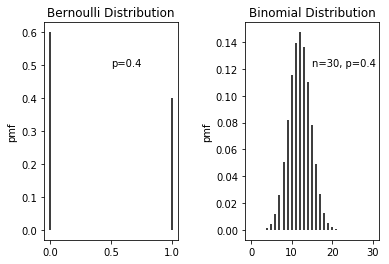

In [2]:

# Density functions

fig = plt.figure()
fig.subplots_adjust(wspace=0.5,hspace=0.5)

# Bernoulli
rv = stats.bernoulli(0.4)                   # So called "Frozen" rv: just means parameters have been fixed.

a1 = fig.add_subplot(1,2,1)
x=[0,1]
_ = a1.vlines(x,0,rv.pmf(x))
_ = a1.set(ylabel="pmf",title="Bernoulli Distribution")
_ = a1.text(0.5,0.8,"p=0.4", transform=a1.transAxes)

# Binomial
n,p = 30, 0.4 
rv = stats.binom(n,p)

a2 = fig.add_subplot(1,2,2)
x =  np.arange(n+1)
_ = a2.vlines(x,0,rv.pmf(x))

_ = a2.set(ylabel="pmf",title="Binomial Distribution")
_ = a2.text(0.5,0.8,"n=30, p=0.4", transform=a2.transAxes)

### Multinomial distribution

Generalization of binomial. $k$ outcomes with given individual probabilities $p_i, i=1 \dots k$, and $n$ trials. Simplest example is throwing dice $n$ times. Random variables in the set $\{X_i\}$ are the number of times each outcome is obtained

$$
    f_{\{X_i\}} (x_1 \dots x_k;n,p_1 \dots p_k) = P [X_1 = x_1 \dots X_k=x_k]=\frac{n!}{x_1!  \dots x_k!} p_1^{x_1} \dots p_k^{x_k} \hspace{2cm} \sum_{i=1}^k x_i = n
$$

Note that this is a **multivariate and joint** probability mass function for $k$ random variables.

**Example**. For six-sided dice, with equal probabilities for each face to appear, the probability of obtaining 5 sixes and 2 each of the other faces is
$$
f_{\{X_i\}} (x_1= x_2 = \dots x_5=2,x_6=5;n=15,p_1=p_2=\dots=p_6=1/6) = \frac{15!}{(2!)^5 5!} (\frac{1}{6})^{15} = 0.0072
$$

The choice of $\{x_i\}$ in this example is very specific. Generally, we are likely to be more interested in finding the probabilities of events such as the one in the next example.

**Example**. What is the probability of getting at least one six in four throws of a fair die?

We could list all possibilities (1 six, 2 sixes, etc.) and the corresponding cases for the remaining throws, but a better way to solve the problem is to consider the probability of no sixes in 4 throws:

$$
\begin{split}
P[\textrm{at least 1 six in 4 throws}] & = 1 - P[\textrm{no sixes in 4 throws}]\\
    & = 1 - (\frac{5}{6})^4 \\
    & = 0.52
\end{split}
$$

So, you need only 4 throws for a better than even chance of getting a six.


In [11]:
x = [2,2,2,2,2,5]
p = [1/6 for p_i in range(6)]

stats.multinomial.pmf(x,n=15,p=[1/6 for p_i in range(6)])
(math.factorial(15)/(math.factorial(5)*(2**5)))*(1/6)**15


0.0007242685563578615

0.0007242685563578548

### Geometric distribution
Binary outcome, with probability of success $p$. Random variable $X$ is number of trials ***before*** first success. The *pmf* is
\begin{equation}
f_X(k;p) = (1-p)^{(k-1)} p^k \hspace{2cm} k \in \{1,2,3 \dots\}
\end{equation}

Expectation and variance of $X$:
\begin{equation}
\mu = \frac{1}{p} \hspace{2cm} \sigma^2 = \frac{(1-p)}{p^2}
\end{equation}
### Negative Binomial distribution
Binary outcome, trials continue until $r$ failures are seen. Random variable $X$ is the number of successes before stopping.
The *pmf* is
\begin{equation}
f_X(k;p,r) = \binom{k+r-1}{k} \cdot p^k (1-p)^r \hspace{2cm} k \in {0,1,2, \dots}
\end{equation}

The superscript on the binomial coefficient in the *pmf* is interesting: since the $r$-th failure is always the last one, the coefficient has to count the ways of choosing $k$ successes out of $(k+r-1)$ trials.

Expectation and variance of $X$:
\begin{equation}
\mu = \frac{pr}{1-p} \hspace{2cm} \sigma^2 = \frac{pr}{(1-p)^2}
\end{equation}

The distribution is called negative binomial because
$$ \binom{k+r-1}{k} = (-1)^k \binom{-r}{k} $$
Proof:

The binomial theorem can be written as:
$$ (1+x)^a = 1 + a x + \frac{a(a-1)x^2}{2!} + \cdots = \sum_{k=0}^\infty \binom{a}{k} x^k$$

When $a$ is negative, $$ \binom{a}{k} = \frac{a(a-1)\dots(a-k+1)}{k!} = \frac{(-1)^k (-a)(-a+1)\dots(-a+k-1)}{k!}$$

Setting $r=-a$, we have $$ \binom{-r}{k} = (-1)^k \frac{r(r+1)\dots(r+k-1)}{k!} = (-1)^k \binom{k+r-1}{k}$$


### Hypergeometric distribution

$n$ draws from a population with $N$ objects, of which $K$ are of one kind. The probability that $k$ of the $n$ draws are of that kind is given by the *pmf*
\begin{equation}
   f_X (k; N,K,n) = \frac{\binom{K}{k} \cdot \binom{N-K}{n-k}}{\binom{N}{n}}
\end{equation}

Expectation and variance:
\begin{equation}
    \mu = n\frac{K}{N} \hspace{2cm} \sigma^2 = n \frac{K}{N} \frac{(N-K)}{N} \frac{(N-n)}{(N-1)}
\end{equation}

[Nice proof on StackExchange](https://math.stackexchange.com/questions/1380460/derivation-of-mean-and-variance-of-hypergeometric-distribution)



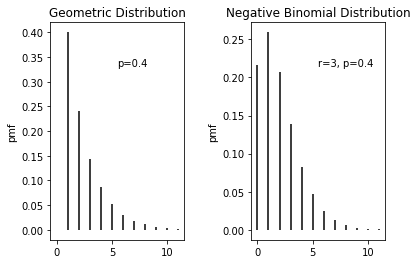

In [10]:
# Density function plots

# Density functions

fig = plt.figure()
fig.subplots_adjust(wspace=0.5,hspace=0.5)

k= np.arange(12)
# Geometric
p=0.4
rv = stats.geom(p)
a1 = fig.add_subplot(1,2,1)

_ = a1.vlines(k,0,rv.pmf(k))
_ = a1.set(ylabel="pmf",title="Geometric Distribution")
_ = a1.text(0.5,0.8,"p=0.4", transform=a1.transAxes)

# Negative Binomial
r,p = 3, 0.4 
rv = stats.nbinom(r,1-p)   # Note: scipy.stats definition is for stopping criterion

a2 = fig.add_subplot(1,2,2)
_ = a2.vlines(k,0,rv.pmf(x))
_ = a2.set(ylabel="pmf",title="Negative Binomial Distribution")
_ = a2.text(0.5,0.8,"r=3, p=0.4", transform=a2.transAxes)